# **Gráficos Dissertação**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import to_rgba

## Carregando os dados e análise

In [2]:
df = pd.read_csv('resultados.csv')

In [3]:
# Verifica de há valores ausentes
df.isnull().sum()

Study                  0
LLM                    0
Request                0
Prompt                 0
Screen                 0
Layout                 0
Context                0
Touch Target           0
Contrast               0
Item Description       0
Text Size              0
Hidden Text            0
Item Label             0
Item Type Label        0
Editable Item Label    0
Clickable Item         0
Total                  0
dtype: int64

In [4]:
df.dtypes

Study                  object
LLM                    object
Request                object
Prompt                  int64
Screen                 object
Layout                 object
Context                 int64
Touch Target            int64
Contrast                int64
Item Description        int64
Text Size               int64
Hidden Text             int64
Item Label              int64
Item Type Label         int64
Editable Item Label     int64
Clickable Item          int64
Total                   int64
dtype: object

In [5]:
# Preenchendo valores NaN com 0 antes de converter para 'int'
df[df.select_dtypes(include=['float64']).columns] = df.select_dtypes(include=['float64']).fillna(0).apply(lambda x: x.astype('int64'))

In [6]:
df.dtypes

Study                  object
LLM                    object
Request                object
Prompt                  int64
Screen                 object
Layout                 object
Context                 int64
Touch Target            int64
Contrast                int64
Item Description        int64
Text Size               int64
Hidden Text             int64
Item Label              int64
Item Type Label         int64
Editable Item Label     int64
Clickable Item          int64
Total                   int64
dtype: object

In [7]:
df.tail()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
325,Study 4,GitHub Copilot,NReq,2,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,1,0,0,0,0,1
326,Study 4,GitHub Copilot,NReq,3,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
327,Study 4,GitHub Copilot,AccessReq,1,SIDEBAR MENU,Chat-JCR,0,0,6,0,0,0,0,0,0,0,6
328,Study 4,GitHub Copilot,AccessReq,2,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,1,0,0,0,0,1
329,Study 4,GitHub Copilot,AccessReq,3,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0


In [8]:
order_screen = ['LOGIN', 'PRODUCT', 'REGISTRATION', 'TO-DO LIST', 'PROFILE', 'MUSIC PLAYER', 'SIDEBAR MENU']
order_request = ['NReq', 'AccessReq']
color_dict_llm = {'ChatGPT-3.5': to_rgba('red', 0),
              'ChatGPT-4o': to_rgba('red', 0),
              'Sabiá-3': to_rgba('red', 0)}
color_dict_screen = {'LOGIN': to_rgba('blue', 0),
              'PRODUCT': to_rgba('blue', 0),
              'REGISTRATION': to_rgba('blue', 0),
              'TO-DO LIST': to_rgba('blue', 0),
              'PROFILE': to_rgba('blue', 0),
              'MUSIC PLAYER': to_rgba('blue', 0),
              'SIDEBAR MENU': to_rgba('blue', 0)}
color_dict_request = {'NReq': to_rgba('red', 0),
              'AccessReq': to_rgba('red', 0)}
color_dict_study = {'Study 1': to_rgba('red', 0),
                    'Study 2': to_rgba('red', 0),
                    'Study 3': to_rgba('red', 0),
                    'Study 4': to_rgba('red', 0)}
color_dict_layout = {'Chat-WR': to_rgba('red', 0),
              'Chat-CLR': to_rgba('red', 0),
              'Chat-JCR': to_rgba('red', 0)}
palette_request = ['#0173B2', '#EB9100']
palette_3 = ['#E69F00', '#56B4E9', '#009E73']
palette_4 = ['#E69F00', '#56B4E9', '#009E73', '#0072B2']
palette_5 = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

In [9]:
sns.set_theme(style="whitegrid")

## Estudo 1

In [10]:
df_estudo1 = df[df['Study'] == 'Study 1']
df_estudo1.tail()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
115,Study 1,ChatGPT-3.5,NReq,2,SIDEBAR MENU,Chat-JCR,0,0,1,0,0,0,0,0,0,0,1
116,Study 1,ChatGPT-3.5,NReq,3,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
117,Study 1,ChatGPT-3.5,AccessReq,1,SIDEBAR MENU,Chat-JCR,0,1,0,0,0,0,0,0,0,0,1
118,Study 1,ChatGPT-3.5,AccessReq,2,SIDEBAR MENU,Chat-JCR,0,0,1,0,0,0,0,0,0,0,1
119,Study 1,ChatGPT-3.5,AccessReq,3,SIDEBAR MENU,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0


In [11]:
from scipy.stats import ttest_rel

# Filtrando os dados para NReq e AccessReq
wr_values = df_estudo1[df_estudo1['Layout'] == 'Chat-WR']['Total']
clr_values = df_estudo1[df_estudo1['Layout'] == 'Chat-CLR']['Total']
jcr_values = df_estudo1[df_estudo1['Layout'] == 'Chat-JCR']['Total']

# Realizando o teste t pareado
# t_stat, p_value = ttest_rel(wr_values, clr_values, nan_policy='omit', alternative='two-sided')
# print(f"Chat-WR e CLR\nT-statistic: {t_stat:.3f}")
# print(f"P-value: {p_value:.5f}")

t_stat, p_value = ttest_rel(wr_values, jcr_values)
print(f"Chat-WR e JCR\nT-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# t_stat, p_value = ttest_rel(clr_values, jcr_values, nan_policy='omit', alternative='two-sided')
# print(f"Chat-CLR e JCR\nT-statistic: {t_stat:.3f}")
# print(f"P-value: {p_value:.5f}")

Chat-WR e JCR
T-statistic: 2.812
P-value: 0.00751


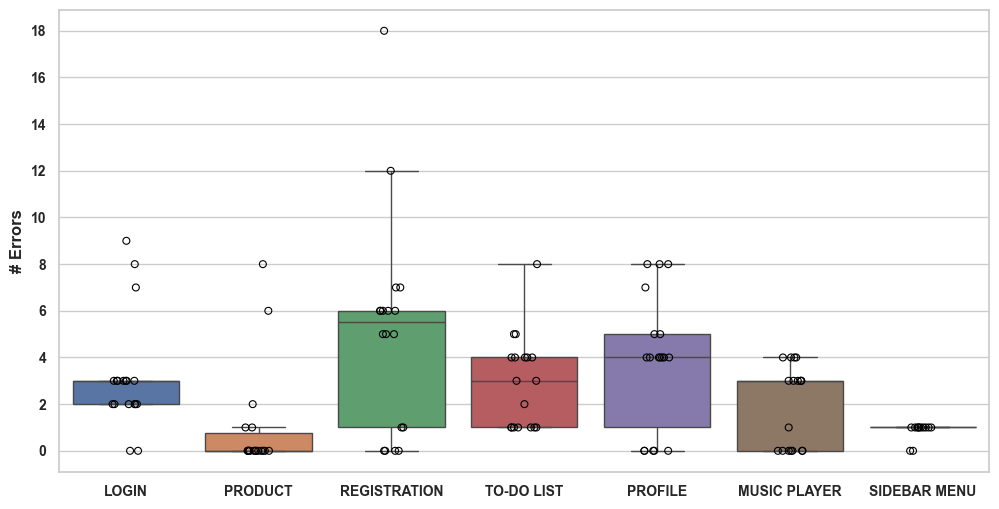

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_estudo1, x='Screen', y='Total', hue='Screen', showfliers=False)
sns.stripplot(data=df_estudo1, x='Screen', y='Total', palette=color_dict_screen, hue='Screen', edgecolor='black', linewidth=.8)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('')
plt.xlabel('')
plt.ylabel('# Errors', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

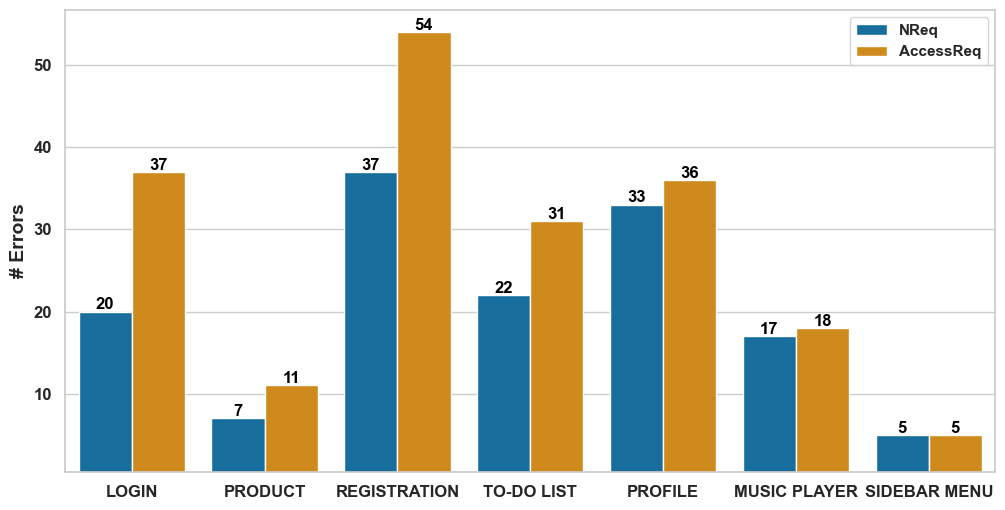

In [13]:
df_t = df_estudo1.groupby(['Request', 'Screen'])['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_t, x='Screen', y='Total', hue='Request', palette=palette_request, order=order_screen, hue_order=order_request)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

# Ajustando os limites do eixo y
ax.set_ylim(0.5, ax.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

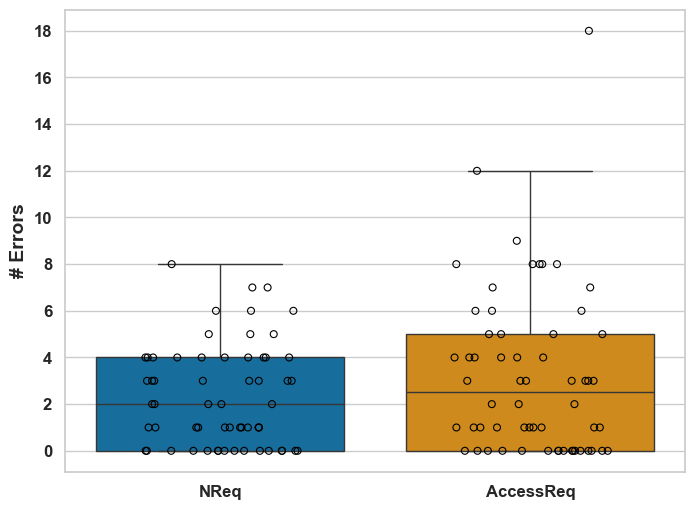

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_estudo1, x='Request', y='Total', hue='Request', palette=palette_request, showfliers=False)
sns.stripplot(data=df_estudo1, x='Request', y='Total', palette=color_dict_request, hue='Request', edgecolor='black', linewidth=.8, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

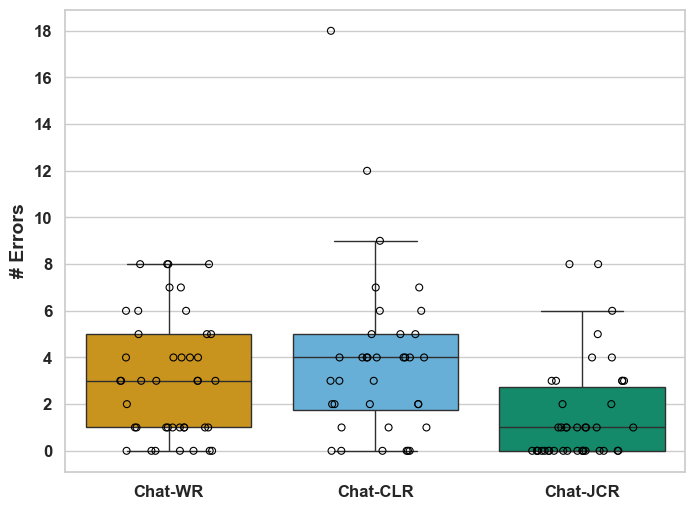

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_estudo1, x='Layout', y='Total', hue='Layout', palette=palette_3, showfliers=False)
sns.stripplot(data=df_estudo1, x='Layout', y='Total', hue='Layout', palette=color_dict_layout, edgecolor='black', linewidth=.8, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

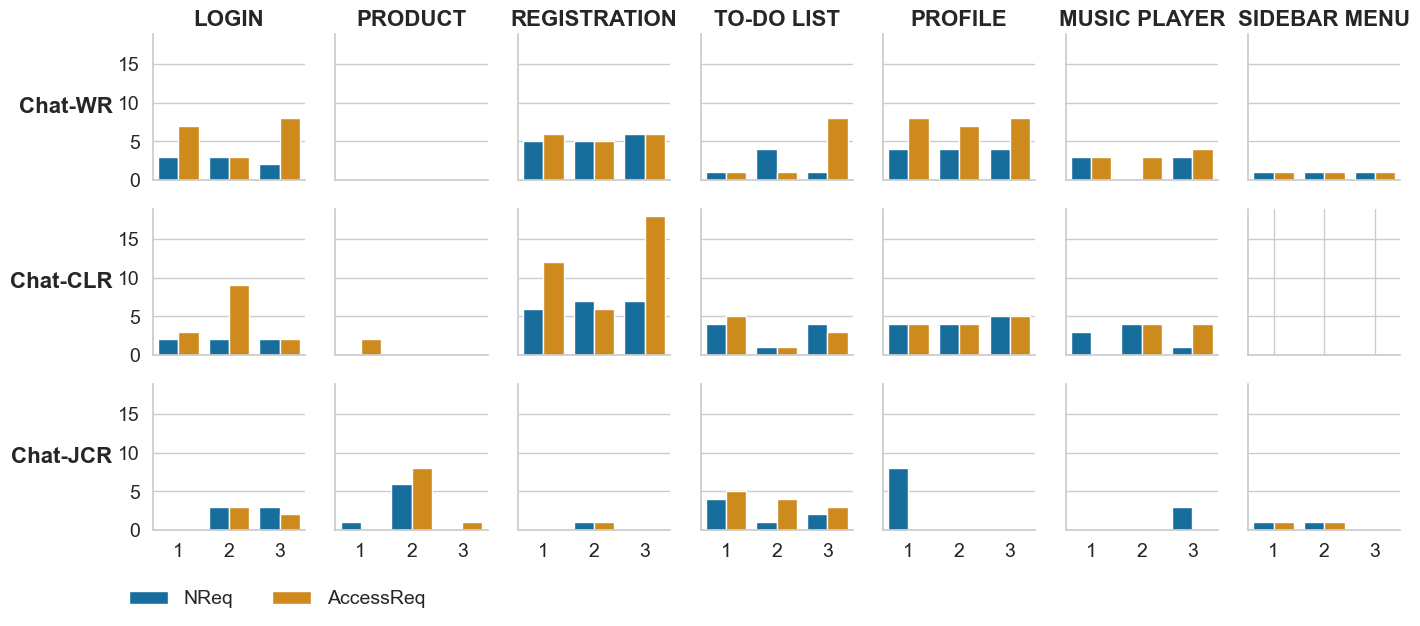

In [16]:
# Configurando o grid de gráficos
g = sns.FacetGrid(
    df_estudo1,
    row="Layout",
    col="Screen",
    margin_titles=True,
    height=2
)

# Adicionando o gráfico de barras
g.map_dataframe(
    sns.barplot,
    x="Prompt",
    y="Total",
    hue="Request",
    palette=palette_request,
    hue_order=order_request,
    dodge=True
)

# Ajustando a legenda
g.add_legend(
    title="",
    title_fontsize=14,
    prop={'size': 14},
    loc="lower left",
    bbox_to_anchor=(0.025, -0.05),
    ncol=2
)

# Ajustando os títulos dos eixos
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="", size=16, weight='bold')

# Ajustando os títulos das linhas (row) para ficarem rotacionados e alinhados à esquerda
for ax, row_val in zip(g.axes[:, 0], df_estudo1["Layout"].unique()):
    ax.yaxis.set_label_position("left")  # Garante que os rótulos fiquem na esquerda
    ax.set_ylabel(row_val, fontsize=16, weight='bold', rotation=0, ha='right', va='center')

# Ajustando a rotação dos rótulos do eixo x
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

# Ajustando o layout
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


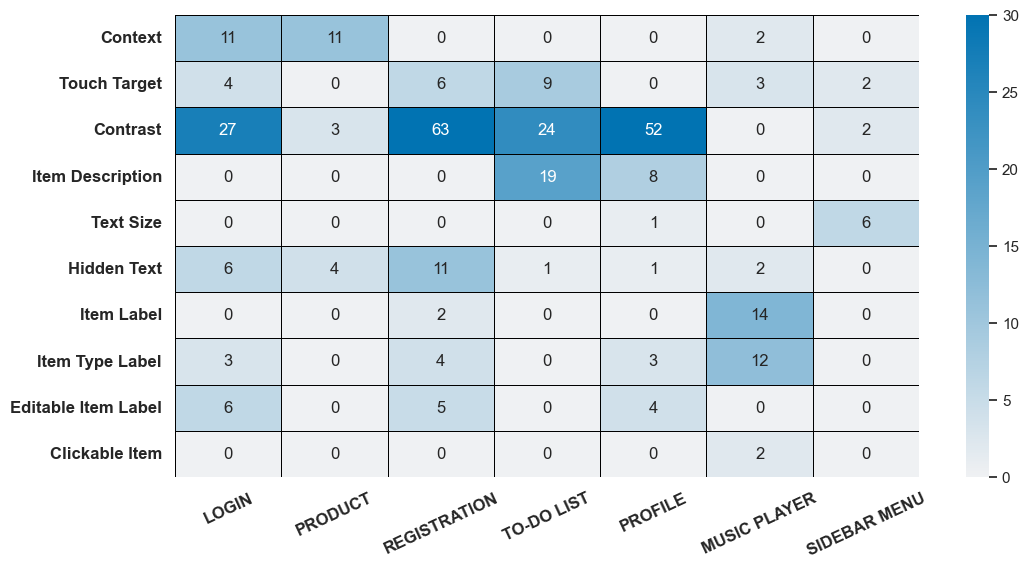

In [17]:
data1 = df_estudo1.pivot_table(index='Screen', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Text Size', 'Hidden Text', 'Item Label', 'Item Type Label', 'Editable Item Label', 'Clickable Item'], aggfunc='sum', sort=False)

plt.figure(figsize=(12, 6))
sns.heatmap(data1.T, annot=True, fmt='d', cmap=sns.light_palette("#0173B2", as_cmap=True), linewidths=.5, linecolor='black', vmax=30)
plt.title('')
plt.xlabel('')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial', rotation=25)
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

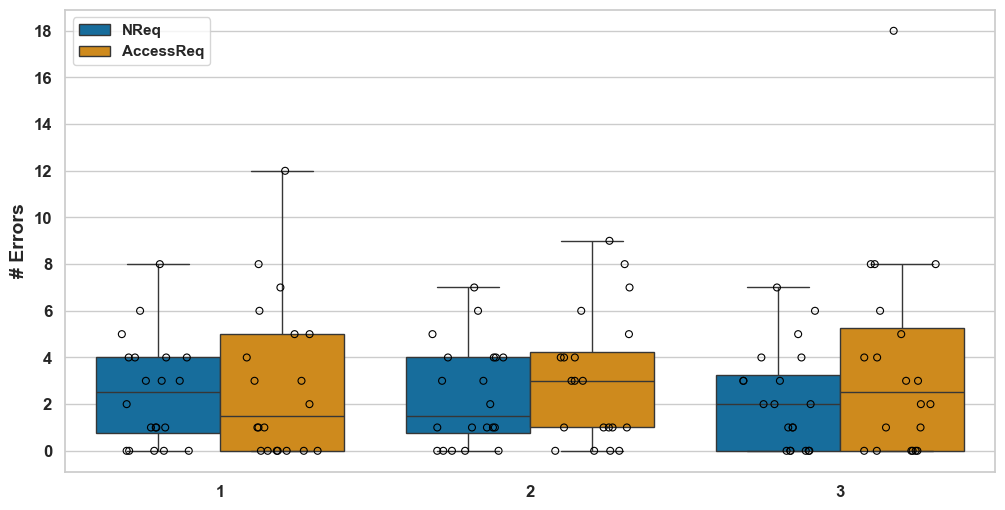

In [18]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_estudo1, x='Prompt', y='Total', hue='Request', palette=palette_request, showfliers=False)
sns.stripplot(data=df_estudo1, x='Prompt', y='Total', hue='Request', palette=color_dict_request, edgecolor='black', linewidth=.8, dodge=True, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'}, handles=ax.get_legend_handles_labels()[0][:len(df['Request'].unique())])
plt.show()

## Estudo 2

In [19]:
df_estudo2 = df[df['Study'] == 'Study 2']
df_estudo2.head()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
120,Study 2,ChatGPT-3.5,NReq,1,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
121,Study 2,ChatGPT-3.5,NReq,2,LOGIN,Chat-JCR,3,0,0,0,0,0,0,0,0,0,3
122,Study 2,ChatGPT-3.5,NReq,3,LOGIN,Chat-JCR,3,0,0,0,0,0,0,0,0,0,3
123,Study 2,ChatGPT-3.5,AccessReq,1,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
124,Study 2,ChatGPT-3.5,AccessReq,2,LOGIN,Chat-JCR,3,0,0,0,0,0,0,0,0,0,3


In [20]:
# Calculando as estatísticas para o estudo no geral
total_geral = df_estudo2['Total'].sum()
media_geral = df_estudo2['Total'].mean()
desvio_padrao_geral = df_estudo2['Total'].std()

# Calculando as estatísticas para cada tipo de Request
estatisticas_request = df_estudo2.groupby('Request')['Total'].agg(['sum', 'mean', 'std'])
estatisticas_request_llm = df_estudo2.groupby(['Request', 'LLM'])['Total'].agg(['sum', 'mean', 'std'])

# Exibindo os resultados
print("Estudo no Geral:")
print(f"Total de Erros: {total_geral}")
print(f"Média de Erros: {media_geral:.2f}")
print(f"Desvio Padrão: {desvio_padrao_geral:.2f}\n")

print("Estatísticas por Request:")
print(estatisticas_request.round(2))

Estudo no Geral:
Total de Erros: 270
Média de Erros: 2.14
Desvio Padrão: 2.48

Estatísticas por Request:
           sum  mean   std
Request                   
AccessReq  144  2.29  2.45
NReq       126  2.00  2.53


In [21]:
# Filtrando os dados para NReq e AccessReq
df_comparison = df_estudo2[df_estudo2['Request'].isin(['NReq', 'AccessReq'])]

# Pivotando os dados para facilitar a comparação
df_pivot = df_comparison.pivot_table(index=['Screen', 'Prompt', 'LLM'], columns='Request', values='Total', aggfunc='sum').reset_index()

# Contando as ocorrências
aumento = (df_pivot['AccessReq'] > df_pivot['NReq']).sum()
diminuicao = (df_pivot['AccessReq'] < df_pivot['NReq']).sum()
igualdade = (df_pivot['AccessReq'] == df_pivot['NReq']).sum()

# Exibindo os resultados
print(f"Aumentos (NReq -> AccessReq): {aumento}")
print(f"Diminuições (NReq -> AccessReq): {diminuicao}")
print(f"Igualdades (NReq == AccessReq): {igualdade}")

Aumentos (NReq -> AccessReq): 24
Diminuições (NReq -> AccessReq): 10
Igualdades (NReq == AccessReq): 29


In [22]:
from scipy.stats import ttest_rel

# Filtrando os dados para NReq e AccessReq
nreq_values = df_estudo2[df_estudo2['Request'] == 'NReq']['Total']
accessreq_values = df_estudo2[df_estudo2['Request'] == 'AccessReq']['Total']

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(nreq_values, accessreq_values)

# Exibindo os resultados
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

T-statistic: -1.374
P-value: 0.17434


In [23]:
# Transformando os dados para o formato longo (melt) para facilitar o gráfico
df_melted_e2 = df_estudo2.melt(id_vars=["LLM", "Request", 'Screen'], value_vars='Total', value_name="Valor")

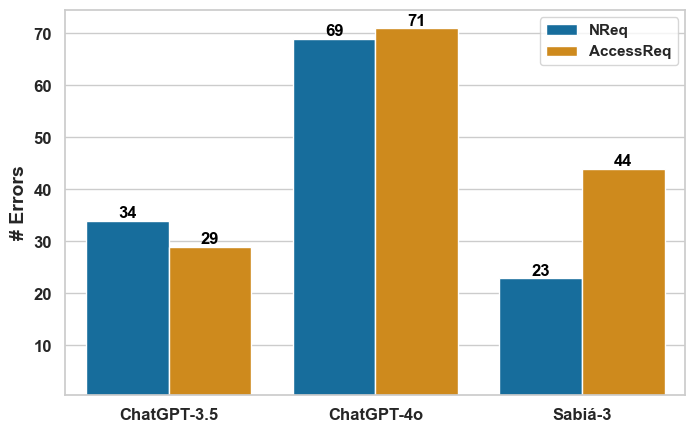

In [24]:
# Somando os valores de erros para cada LLM e Request
df_melted_sum = df_melted_e2.groupby(["LLM", "Request"]).sum().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_melted_sum, x='LLM', y='Valor', hue='Request', palette=palette_request, hue_order=order_request)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

# Ajustando os limites do eixo y
ax.set_ylim(0.5, ax.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

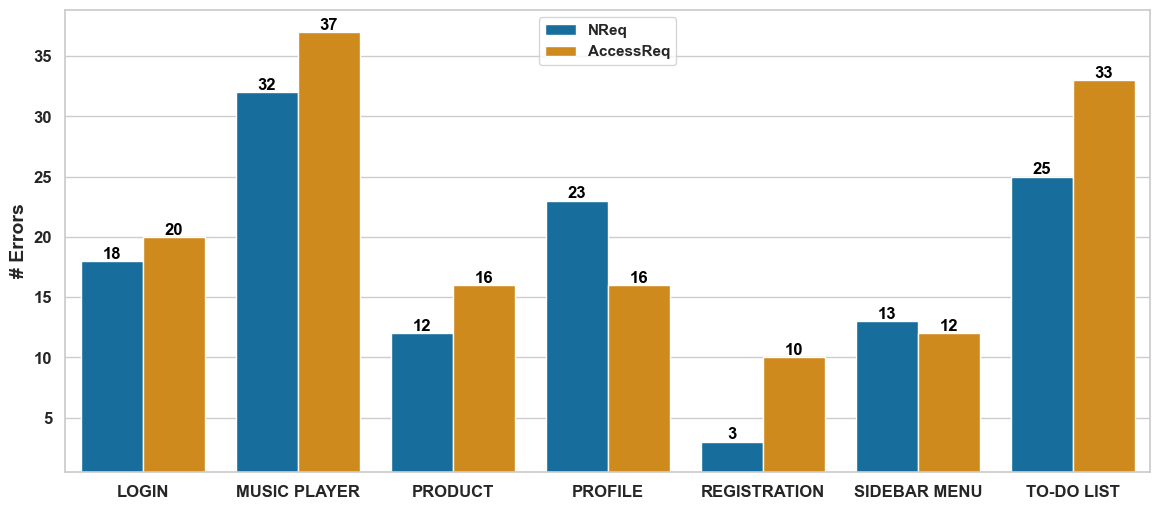

In [25]:
# Somando os valores de erros para cada LLM e Request
df_melted_sum = df_melted_e2.groupby(["Screen", "Request"]).sum().reset_index()

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_melted_sum, x='Screen', y='Valor', hue='Request', palette=palette_request, hue_order=order_request)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

# Ajustando os limites do eixo y
ax.set_ylim(0.5, ax.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', loc='upper center', prop={'weight': 'bold'})
plt.show()

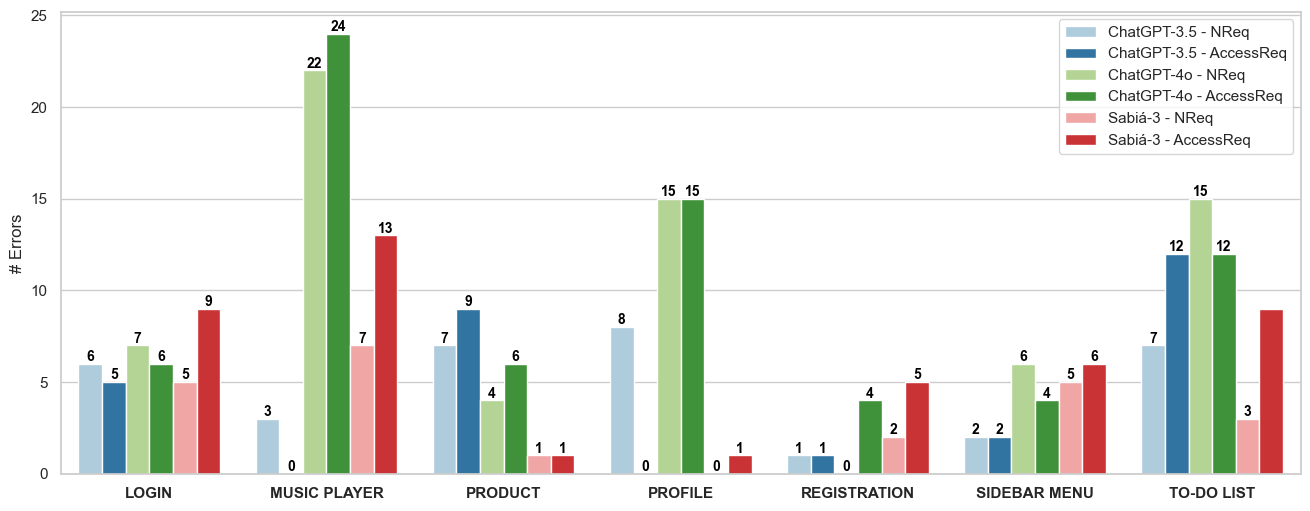

In [26]:
# Ajustando o dataframe para separar NReq e AccessReq corretamente no gráfico
df_new_melt = df_melted_e2.copy()
df_new_melt["Métrica_Modelo"] = df_new_melt["LLM"] + " - " + df_new_melt["Request"]

# Somando os valores
df_new_melt = df_new_melt.groupby(["LLM", "Request", "Screen", "Métrica_Modelo"]).sum().reset_index()

# Criando o gráfico corrigido
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df_new_melt, x="Screen", y="Valor", hue="Métrica_Modelo", palette='Paired', dodge=True, errorbar=None, hue_order=['ChatGPT-3.5 - NReq', 'ChatGPT-3.5 - AccessReq', 'ChatGPT-4o - NReq', 'ChatGPT-4o - AccessReq', 'Sabiá-3 - NReq', 'Sabiá-3 - AccessReq'])

# Adicionando os valores no topo de cada barra
i = 1
for p in ax.patches:
    if i < ax.patches.__len__() - 6:
        ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=10, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto
        i += 1
    else:
        break

# Ajustando rótulos
plt.xticks(fontweight='bold')
plt.xlabel("")
plt.ylabel("# Errors")
plt.title("")
plt.legend(title="")

# Exibir o gráfico
plt.show()

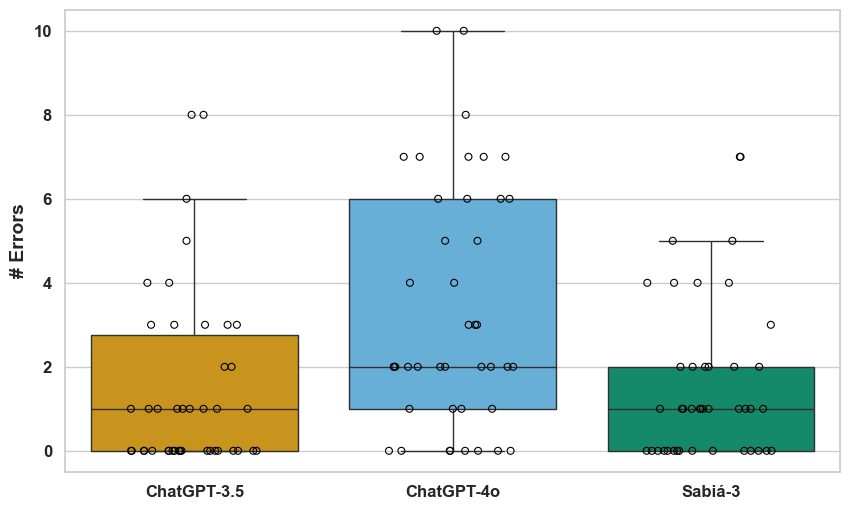

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_estudo2, x='LLM', y='Total', hue='LLM', palette=palette_3, showfliers=False)

sns.stripplot(data=df_estudo2, x='LLM', y='Total', palette=color_dict_llm, hue='LLM', edgecolor='black', linewidth=.8, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

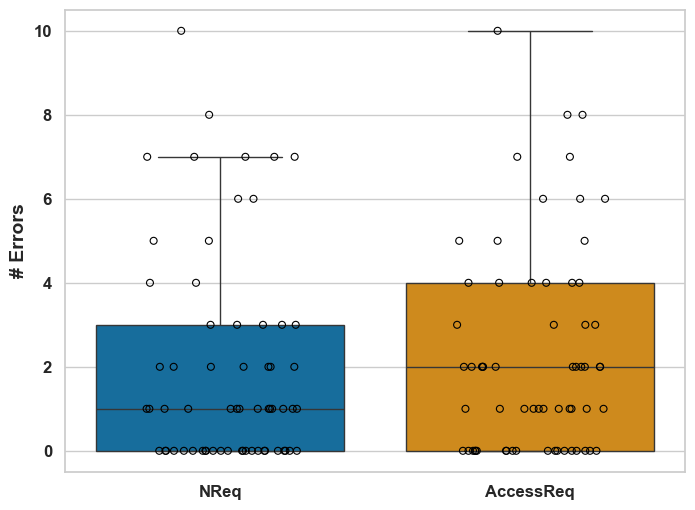

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_estudo2, x='Request', y='Total', hue='Request', palette=palette_request, showfliers=False)
sns.stripplot(data=df_estudo2, x='Request', y='Total', palette=color_dict_request, hue='Request', edgecolor='black', linewidth=.8, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

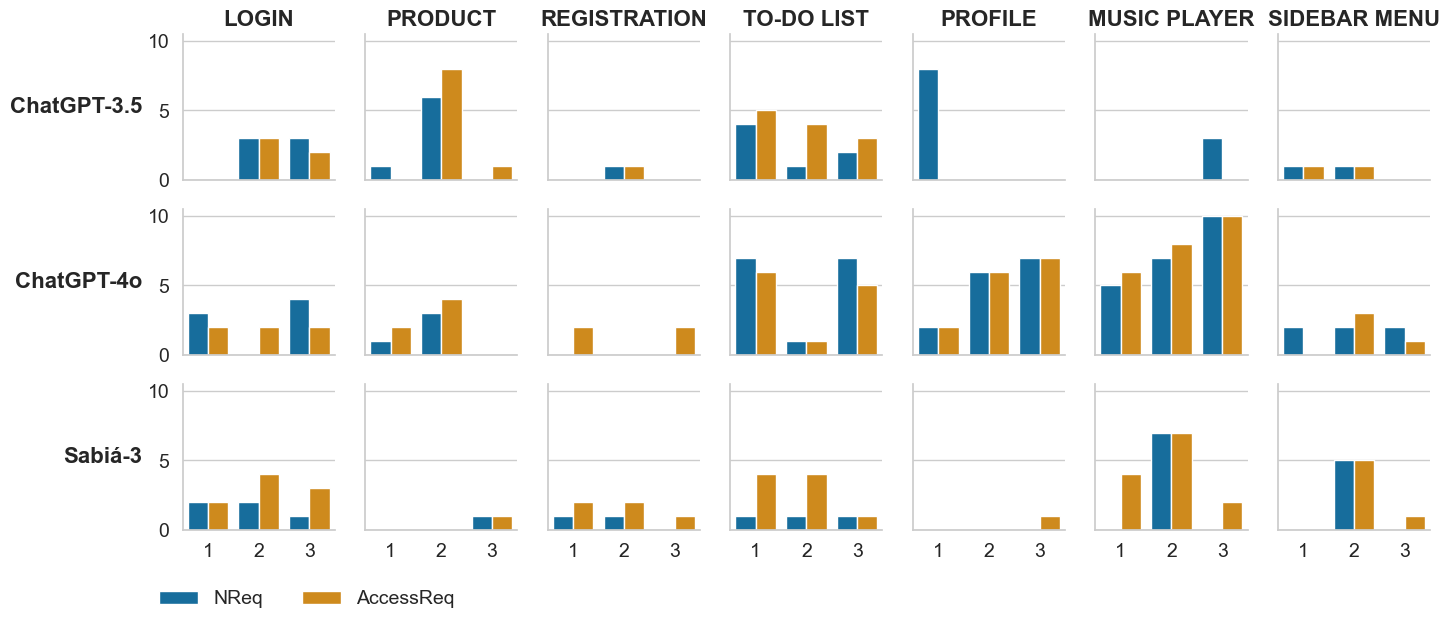

In [29]:
# Configurando o grid de gráficos
g = sns.FacetGrid(
    df_estudo2,
    row="LLM",
    col="Screen",
    margin_titles=True,
    height=2
)

# Adicionando o gráfico de barras
g.map_dataframe(
    sns.barplot,
    x="Prompt",
    y="Total",
    hue="Request",
    palette=palette_request,
    hue_order=order_request,
    dodge=True
)

# Ajustando a legenda
g.add_legend(
    title="",
    title_fontsize=14,
    prop={'size': 14},
    loc="lower left",
    bbox_to_anchor=(0.025, -0.05),
    ncol=2
)

# Ajustando os títulos dos eixos
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="", size=16, weight='bold')

# Ajustando os títulos das linhas (row) para ficarem rotacionados e alinhados à esquerda
for ax, row_val in zip(g.axes[:, 0], df_estudo2["LLM"].unique()):
    ax.yaxis.set_label_position("left")  # Garante que os rótulos fiquem na esquerda
    ax.set_ylabel(row_val, fontsize=16, weight='bold', rotation=0, ha='right', va='center')

# Ajustando a rotação dos rótulos do eixo x
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

# Ajustando o layout
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


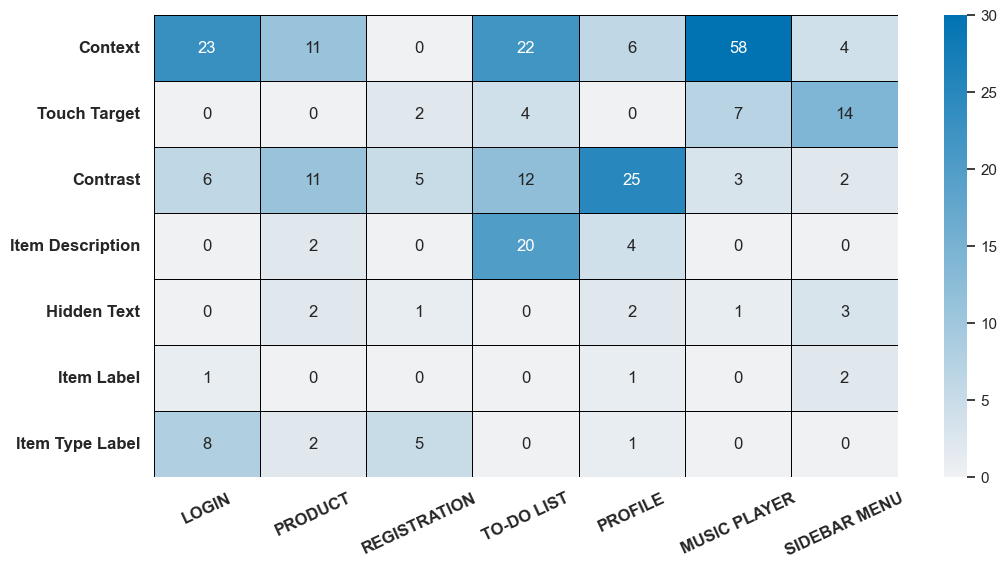

In [30]:
data2 = df_estudo2.pivot_table(index='Screen', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Hidden Text', 'Item Label', 'Item Type Label'], aggfunc='sum', sort=False)

plt.figure(figsize=(12, 6))
sns.heatmap(data2.T, annot=True, fmt='d', cmap=sns.light_palette("#0173B2", as_cmap=True), linewidths=.5, linecolor='black', vmax=30)
plt.title('')
plt.xlabel('')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial', rotation=25)
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

## Estudo 3

In [31]:
df_estudo3 = df[df['Study'] == 'Study 3']
df_estudo3.head()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
246,Study 3,ChatGPT-4o,NReq,1,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
247,Study 3,ChatGPT-4o,NReq,2,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
248,Study 3,ChatGPT-4o,NReq,3,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
249,Study 3,ChatGPT-4o,AccessReq,1,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
250,Study 3,ChatGPT-4o,AccessReq,2,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Calculando as estatísticas para o estudo no geral
total_geral = df_estudo3['Total'].sum()
media_geral = df_estudo3['Total'].mean()
desvio_padrao_geral = df_estudo3['Total'].std()

# Calculando as estatísticas para cada tipo de Request
estatisticas_request = df_estudo3.groupby('Request')['Total'].agg(['sum', 'mean', 'std'])

# Exibindo os resultados
print("Estudo no Geral:")
print(f"Total de Erros: {total_geral}")
print(f"Média de Erros: {media_geral:.2f}")
print(f"Desvio Padrão: {desvio_padrao_geral:.2f}\n")

print("Estatísticas por Request:")
print(estatisticas_request.round(2))

Estudo no Geral:
Total de Erros: 47
Média de Erros: 1.12
Desvio Padrão: 1.81

Estatísticas por Request:
           sum  mean   std
Request                   
AccessReq   19  0.90  1.34
NReq        28  1.33  2.20


In [33]:
# Filtrando os dados para NReq e AccessReq
df_comparison = df_estudo3[df_estudo3['Request'].isin(['NReq', 'AccessReq'])]

# Pivotando os dados para facilitar a comparação
df_pivot = df_comparison.pivot_table(index=['Screen', 'Prompt'], columns='Request', values='Total', aggfunc='sum').reset_index()

# Contando as ocorrências
aumento = (df_pivot['AccessReq'] > df_pivot['NReq']).sum()
diminuicao = (df_pivot['AccessReq'] < df_pivot['NReq']).sum()
igualdade = (df_pivot['AccessReq'] == df_pivot['NReq']).sum()

# Exibindo os resultados
print(f"Aumentos (NReq -> AccessReq): {aumento}")
print(f"Diminuições (NReq -> AccessReq): {diminuicao}")
print(f"Igualdades (NReq == AccessReq): {igualdade}")

Aumentos (NReq -> AccessReq): 2
Diminuições (NReq -> AccessReq): 4
Igualdades (NReq == AccessReq): 15


In [34]:
from scipy.stats import ttest_rel

# Filtrando os dados para NReq e AccessReq
nreq_values = df_estudo3[df_estudo3['Request'] == 'NReq']['Total']
accessreq_values = df_estudo3[df_estudo3['Request'] == 'AccessReq']['Total']

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(nreq_values, accessreq_values)

# Exibindo os resultados
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 0.952
P-value: 0.35253


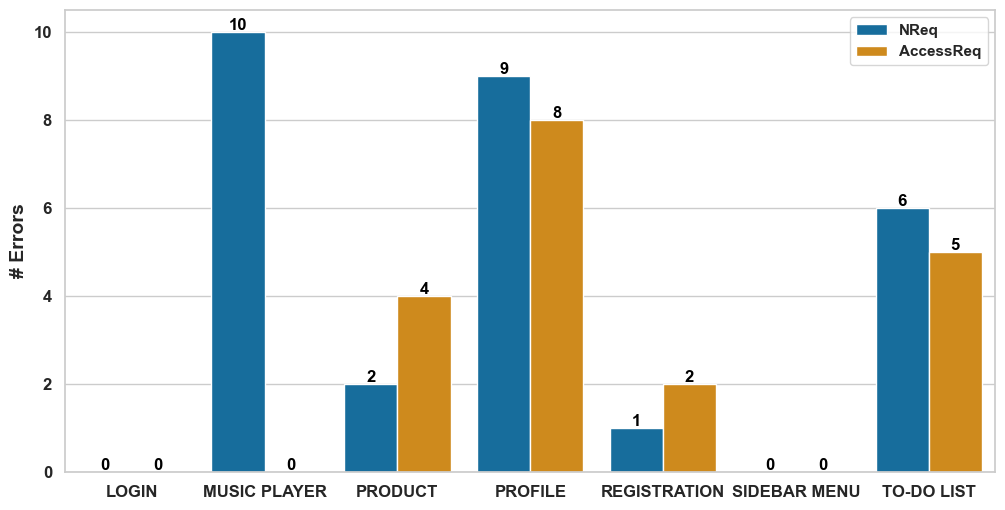

In [35]:
df_t3 = df_estudo3.groupby(['Request', 'Screen'])['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_t3, x='Screen', y='Total', hue='Request', palette=palette_request, hue_order=order_request)

# Adicionando os valores no topo de cada barra
i = 1
for p in ax.patches:
    if i < ax.patches.__len__() - 1:
        ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto
        i += 1
    else:
        break

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

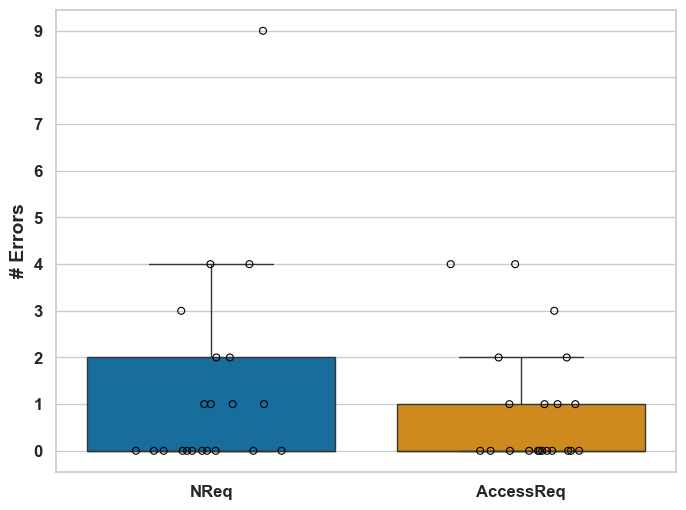

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_estudo3, x='Request', y='Total', hue='Request', palette=palette_request, showfliers=False)
sns.stripplot(data=df_estudo3, x='Request', y='Total', palette=color_dict_request, hue='Request', edgecolor='black', linewidth=.8, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

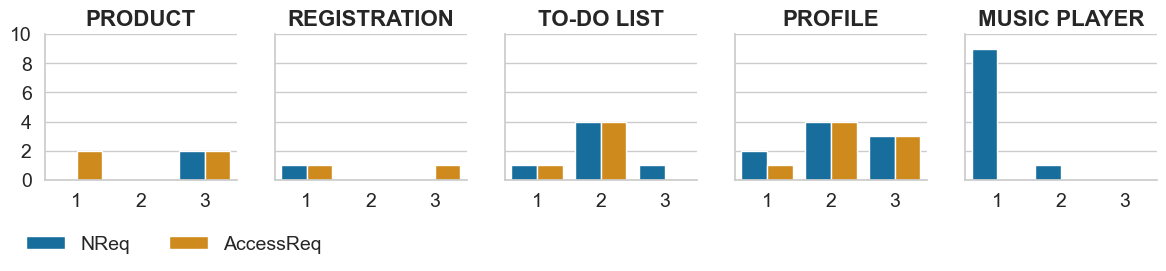

In [37]:
# Filtrando as colunas que possuem erros (valores diferentes de zero) e as telas desejadas
df_filtered = df_estudo3.loc[
    (df_estudo3['Screen'].isin(['PRODUCT', 'REGISTRATION', 'TO-DO LIST', 'PROFILE', 'MUSIC PLAYER'])) &
    (df_estudo3 != 0).any(axis=1)
]

# Configurando o grid de gráficos
g = sns.FacetGrid(
    df_filtered,
    col="Screen",
    margin_titles=True,
    height=2.5
)

# Adicionando o gráfico de barras
g.map_dataframe(
    sns.barplot,
    x="Prompt",
    y="Total",
    hue="Request",
    palette=palette_request,
    hue_order=order_request,
    dodge=True
)

# Ajustando a legenda
g.add_legend(
    title="",
    title_fontsize=14,
    prop={'size': 14},
    loc="lower left",
    bbox_to_anchor=(0.025, -0.1),
    ncol=2
)

# Ajustando os títulos dos eixos
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="", size=16, weight='bold')
g.set(ylim=(0, 10))

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, symmetric=True))

# Ajustando a rotação dos rótulos do eixo x
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

# Ajustando o layout
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


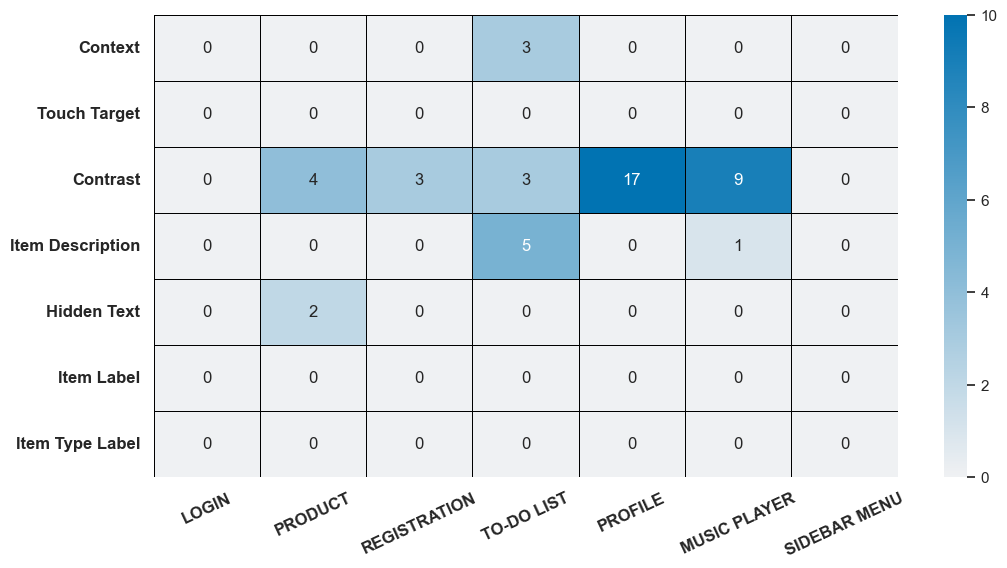

In [38]:
data3 = df_estudo3.pivot_table(index='Screen', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Hidden Text', 'Item Label', 'Item Type Label'], aggfunc='sum', sort=False)

plt.figure(figsize=(12, 6))
sns.heatmap(data3.T, annot=True, fmt='d', cmap=sns.light_palette("#0173B2", as_cmap=True), linewidths=.5, linecolor='black', vmax=10)
plt.title('')
plt.xlabel('')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial', rotation=25)
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

## Estudo 4

In [39]:
df_estudo4 = df[df['Study'] == 'Study 4']
df_estudo4.head()

,Study,LLM,Request,Prompt,Screen,Layout,Context,Touch Target,Contrast,Item Description,Text Size,Hidden Text,Item Label,Item Type Label,Editable Item Label,Clickable Item,Total
288,Study 4,GitHub Copilot,NReq,1,LOGIN,Chat-JCR,2,0,2,0,0,0,0,0,0,0,4
289,Study 4,GitHub Copilot,NReq,2,LOGIN,Chat-JCR,1,0,0,0,0,0,0,0,0,0,1
290,Study 4,GitHub Copilot,NReq,3,LOGIN,Chat-JCR,0,0,0,0,0,0,0,0,0,0,0
291,Study 4,GitHub Copilot,AccessReq,1,LOGIN,Chat-JCR,2,0,0,0,0,0,0,0,0,0,2
292,Study 4,GitHub Copilot,AccessReq,2,LOGIN,Chat-JCR,1,0,0,0,0,0,0,0,0,0,1


In [40]:
# Calculando as estatísticas para o estudo no geral
total_geral = df_estudo4['Total'].sum()
media_geral = df_estudo4['Total'].mean()
desvio_padrao_geral = df_estudo4['Total'].std()

# Calculando as estatísticas para cada tipo de Request
estatisticas_request = df_estudo4.groupby('Request')['Total'].agg(['sum', 'mean', 'std'])

# Exibindo os resultados
print("Estudo no Geral:")
print(f"Total de Erros: {total_geral}")
print(f"Média de Erros: {media_geral:.2f}")
print(f"Desvio Padrão: {desvio_padrao_geral:.2f}\n")

print("Estatísticas por Request:")
print(estatisticas_request.round(2))

Estudo no Geral:
Total de Erros: 115
Média de Erros: 2.74
Desvio Padrão: 2.84

Estatísticas por Request:
           sum  mean   std
Request                   
AccessReq   61  2.90  2.90
NReq        54  2.57  2.84


In [41]:
# Filtrando os dados para NReq e AccessReq
df_comparison = df_estudo4[df_estudo4['Request'].isin(['NReq', 'AccessReq'])]

# Pivotando os dados para facilitar a comparação
df_pivot = df_comparison.pivot_table(index=['Screen', 'Prompt'], columns='Request', values='Total', aggfunc='sum').reset_index()

# Contando as ocorrências
aumento = (df_pivot['AccessReq'] > df_pivot['NReq']).sum()
diminuicao = (df_pivot['AccessReq'] < df_pivot['NReq']).sum()
igualdade = (df_pivot['AccessReq'] == df_pivot['NReq']).sum()

# Exibindo os resultados
print(f"Aumentos (NReq -> AccessReq): {aumento}")
print(f"Diminuições (NReq -> AccessReq): {diminuicao}")
print(f"Igualdades (NReq == AccessReq): {igualdade}")

Aumentos (NReq -> AccessReq): 6
Diminuições (NReq -> AccessReq): 4
Igualdades (NReq == AccessReq): 11


In [42]:
from scipy.stats import ttest_rel

# Filtrando os dados para NReq e AccessReq
nreq_values = df_estudo4[df_estudo4['Request'] == 'NReq']['Total']
accessreq_values = df_estudo4[df_estudo4['Request'] == 'AccessReq']['Total']

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(nreq_values, accessreq_values)

# Exibindo os resultados
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

T-statistic: -0.863
P-value: 0.39840


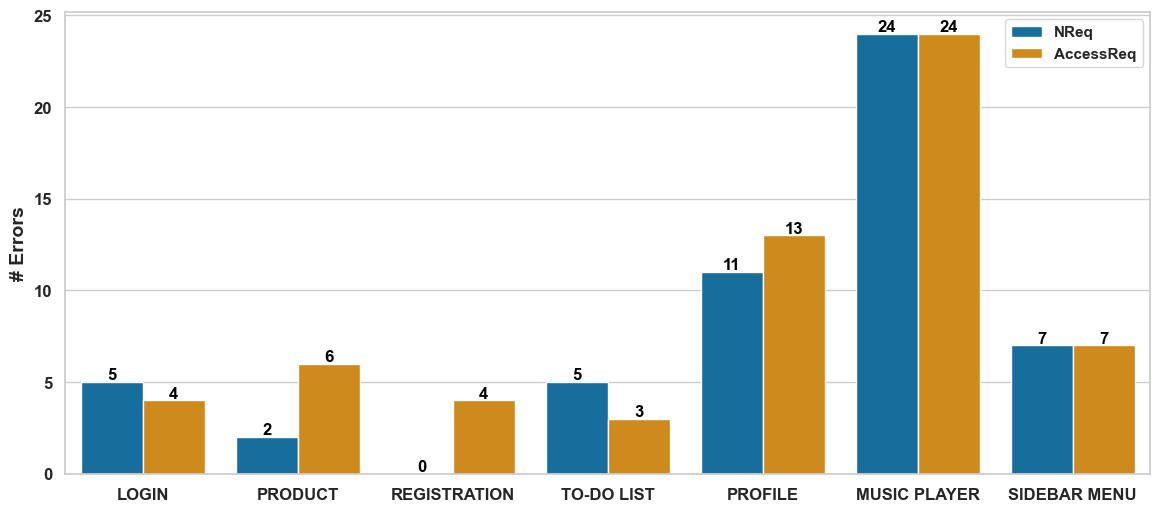

In [43]:
df_t4 = df_estudo4.groupby(['Request', 'Screen'])['Total'].sum().reset_index()

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_t4, x='Screen', y='Total', hue='Request', palette=palette_request, order=order_screen, hue_order=order_request)

# Adicionando os valores no topo de cada barra
i = 1
for p in ax.patches:
    if i < ax.patches.__len__() - 1:
        ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto
        i += 1
    else:
        break

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

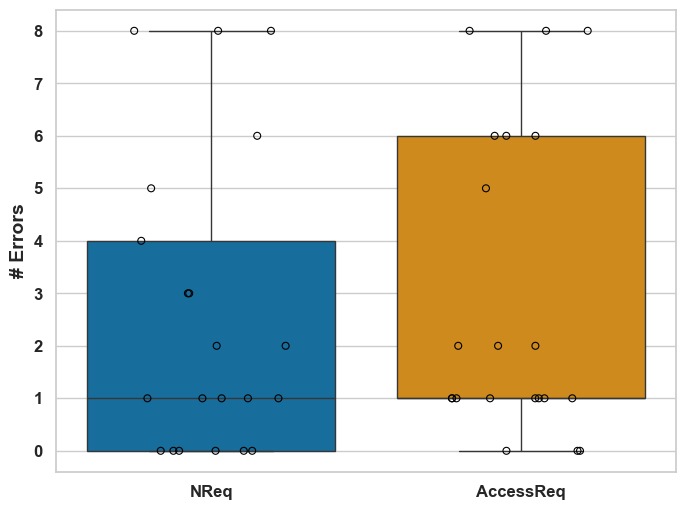

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_estudo4, x='Request', y='Total', hue='Request', palette=palette_request, showfliers=False)
sns.stripplot(data=df_estudo4, x='Request', y='Total', palette=color_dict_request, hue='Request', edgecolor='black', linewidth=.8, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

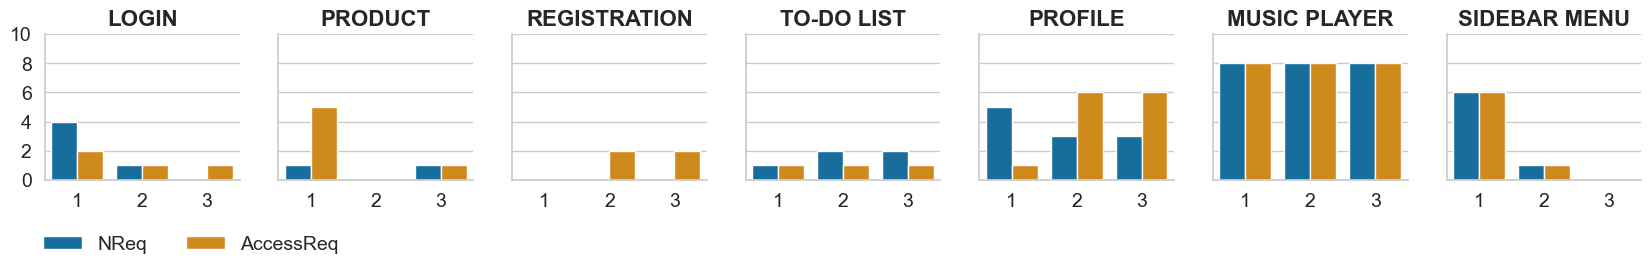

In [45]:
# Configurando o grid de gráficos
g = sns.FacetGrid(
    df_estudo4,
    col="Screen",
    margin_titles=True,
    height=2.5
)

# Adicionando o gráfico de barras
g.map_dataframe(
    sns.barplot,
    x="Prompt",
    y="Total",
    hue="Request",
    palette=palette_request,
    hue_order=order_request,
    dodge=True
)

# Ajustando a legenda
g.add_legend(
    title="",
    title_fontsize=14,
    prop={'size': 14},
    loc="lower left",
    bbox_to_anchor=(0.025, -0.1),
    ncol=2
)

# Ajustando os títulos dos eixos
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="", size=16, weight='bold')
g.set(ylim=(0, 10))

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, symmetric=True))

# Ajustando a rotação dos rótulos do eixo x
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        label.set_fontsize(14)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)

# Ajustando o layout
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


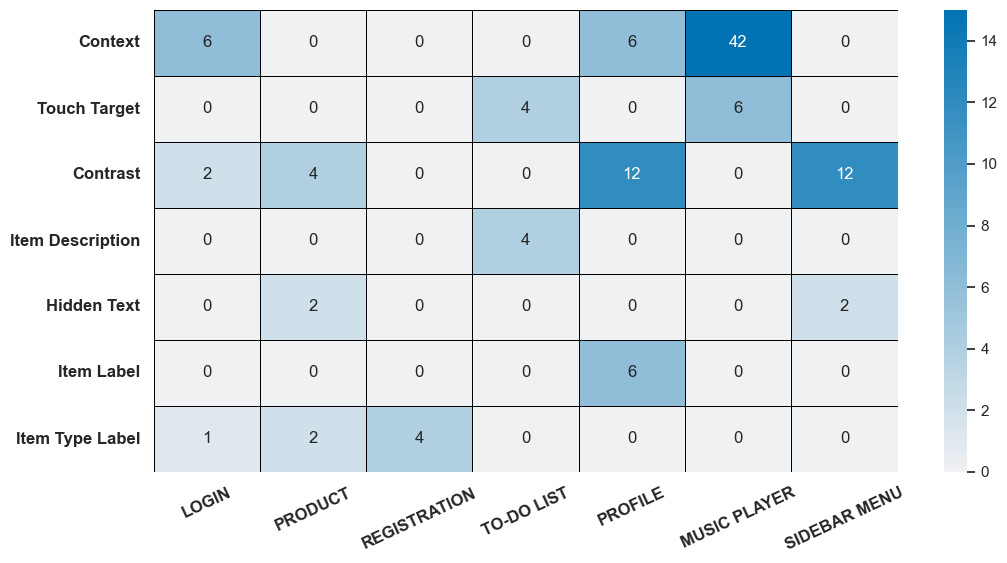

In [46]:
data4 = df_estudo4.pivot_table(index='Screen', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Hidden Text', 'Item Label', 'Item Type Label'], aggfunc='sum', sort=False)

plt.figure(figsize=(12, 6))
sns.heatmap(data4.T, annot=True, fmt='d', cmap=sns.light_palette("#0173B2", as_cmap=True), linewidths=.5, linecolor='black', vmax=15)
plt.title('')
plt.xlabel('')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial', rotation=25)
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.show()

## Todos os estudos

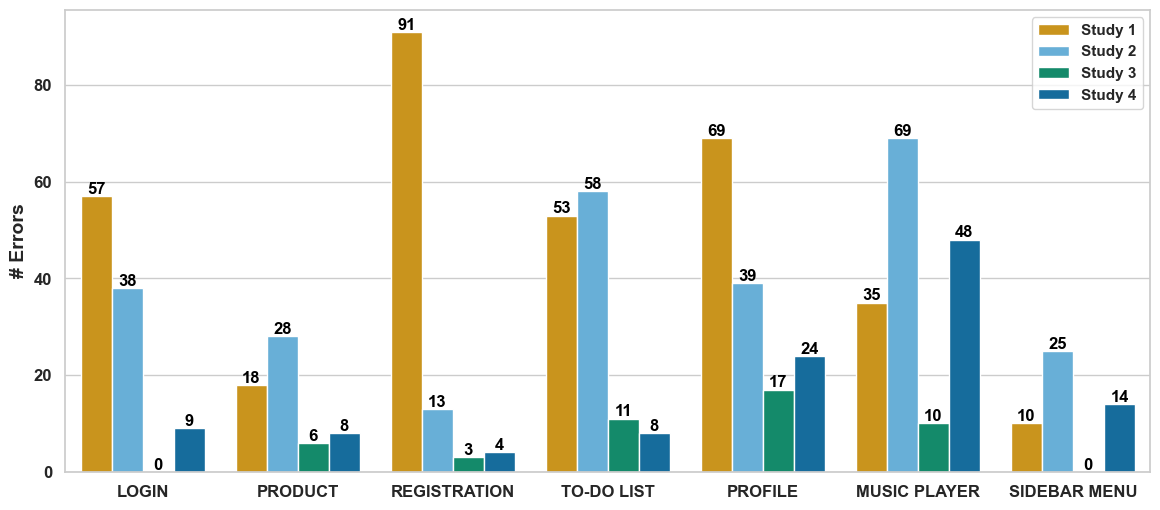

In [47]:
# Agrupando os dados por 'Study' e somando os totais de 'Total'
df_total = df.groupby(['Study', 'Screen'])['Total'].sum().reset_index()

# Criando o gráfico de barras com os totais corrigidos
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_total, x='Screen', y='Total', hue='Study', palette=palette_4, order=order_screen)

# Adicionando os valores no topo de cada barra com formatação como inteiros
i = 1
for p in ax.patches:
    if i < ax.patches.__len__() - 3:
        ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto
        i += 1
    else:
        break

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

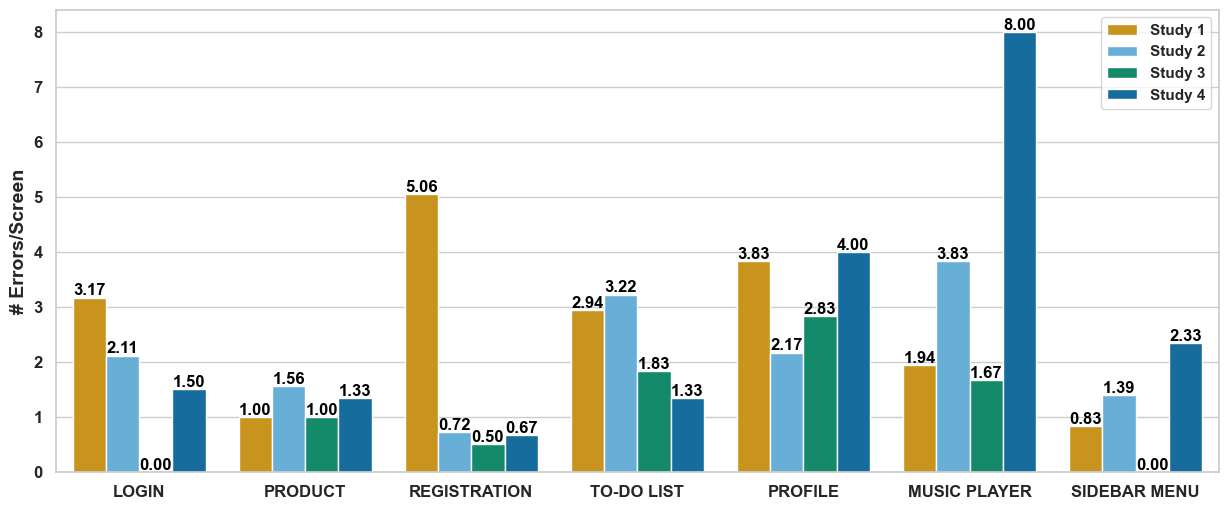

In [48]:
# Média de erros por tela
df_total['Media'] = df_total.apply(
    lambda row: row['Total'] / 12 if row['Study'] == 'Study 1' and row['Screen'] == 'SIDEBAR MENU' 
    else (row['Total'] / 18 if row['Study'] in ['Study 1', 'Study 2'] else row['Total'] / 6), axis=1
)

# Criando o gráfico de barras com os totais corrigidos
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df_total, x='Screen', y='Media', hue='Study', palette=palette_4, order=order_screen)

# Adicionando os valores no topo de cada barra com formatação como float (duas casas decimais)
i = 0
for p in ax.patches:
    i+=1
    if isinstance(p.get_height(), float):
        ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto

plt.xlabel('')
plt.ylabel('# Errors/Screen', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

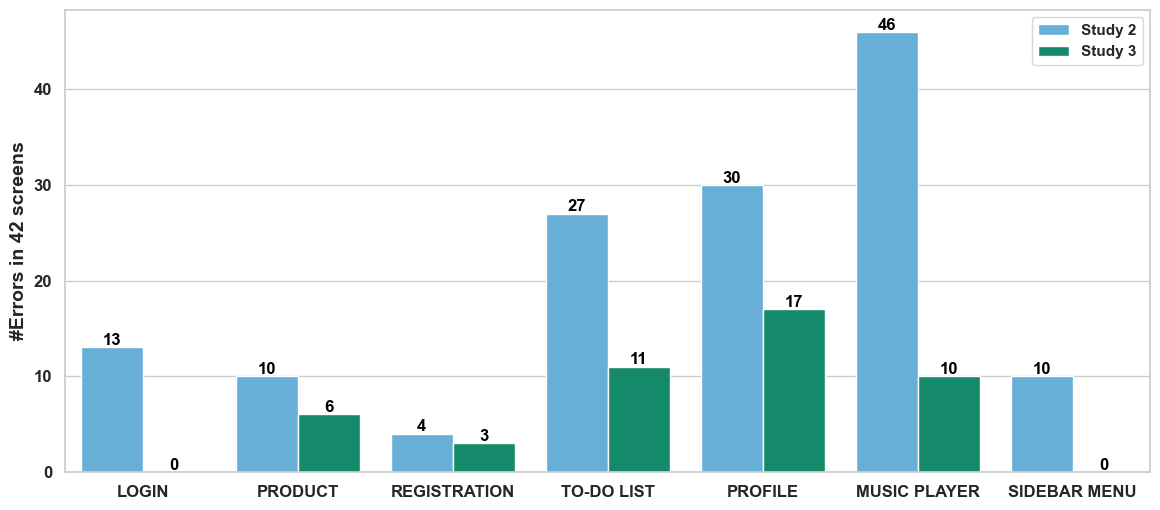

In [49]:
df_gpt = pd.concat([df_estudo2[df_estudo2['LLM'] == 'ChatGPT-4o'], df_estudo3])
df_gpt = df_gpt.groupby(['Study', 'Screen'])['Total'].sum().reset_index()

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_gpt, x='Screen', y='Total', hue='Study', palette=['#56B4E9', '#009E73'], order=order_screen, errorbar=None)

# Adicionando os valores no topo de cada barra com formatação como inteiros
i = 1
for p in ax.patches:
    if i < ax.patches.__len__() - 1:
        ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto
        i += 1
    else:
        break

plt.title('')
plt.xlabel('')
plt.ylabel('#Errors in 42 screens', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

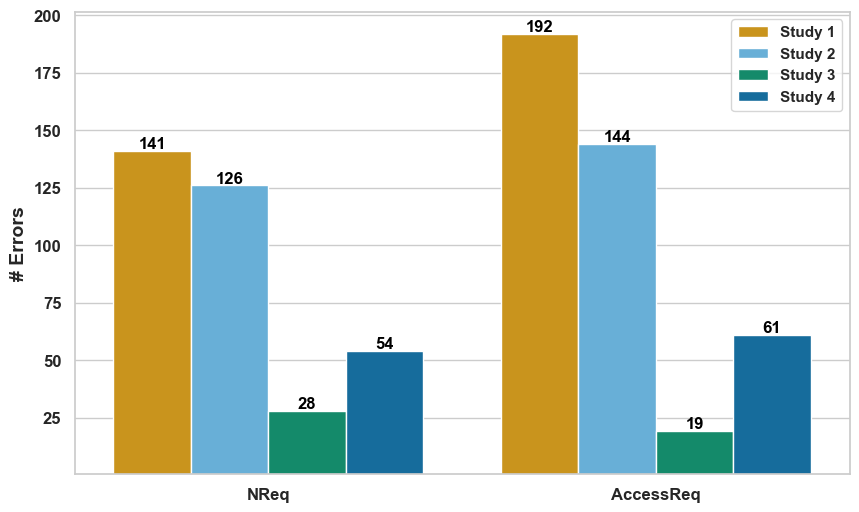

In [50]:
# Agrupando os dados por 'Study' e somando os totais de 'Total'
df_total_req = df.groupby(['Study', 'Request'])['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
ad = sns.barplot(data=df_total_req, x='Request', y='Total', hue='Study', palette=palette_4, order=['NReq', 'AccessReq'])

# Adicionando os valores no topo de cada barra com formatação como inteiros
for p in ad.patches:
    ad.annotate(f'{int(p.get_height())}',  # Exibe o valor correto no topo da barra
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontfamily='Arial', fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto
    
# Ajustando os limites do eixo y
ad.set_ylim(0.5, ad.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

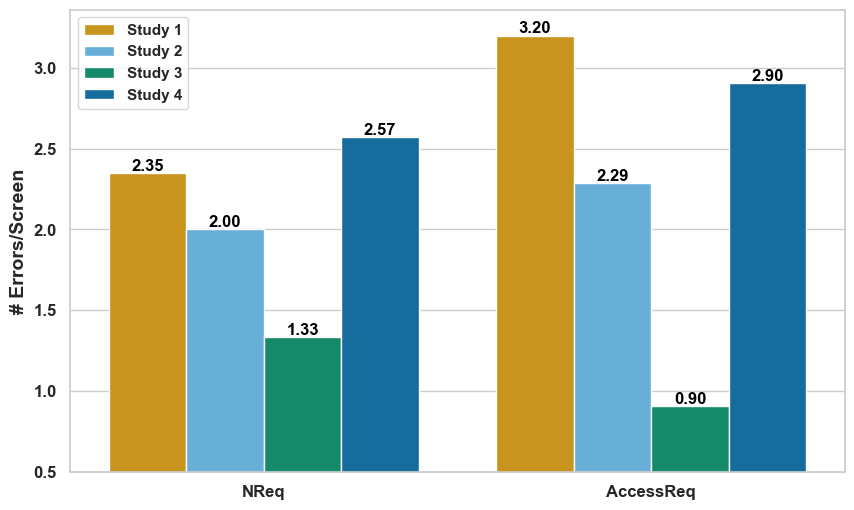

In [51]:
df_total_req['Media'] = df_total_req['Total'] / [60, 60, 63, 63, 21, 21, 21, 21]

plt.figure(figsize=(10, 6))
ad = sns.barplot(data=df_total_req, x='Request', y='Media', hue='Study', palette=palette_4, order=order_request)

# Adicionando os valores no topo de cada barra com formatação como inteiros
for p in ad.patches:
    ad.annotate(f'{p.get_height():.2f}',  # Exibe o valor correto no topo da barra
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
                ha='center', va='center',  # Alinhamento horizontal e vertical
                fontsize=12, fontfamily='Arial', fontweight='bold', color='black',  # Estilo do texto
                xytext=(0, 5),  # Deslocamento do texto
                textcoords='offset points')  # Coordenadas do texto
    
# Ajustando os limites do eixo y
ad.set_ylim(0.5, ad.get_ylim()[1])

plt.xlabel('')
plt.ylabel('# Errors/Screen', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

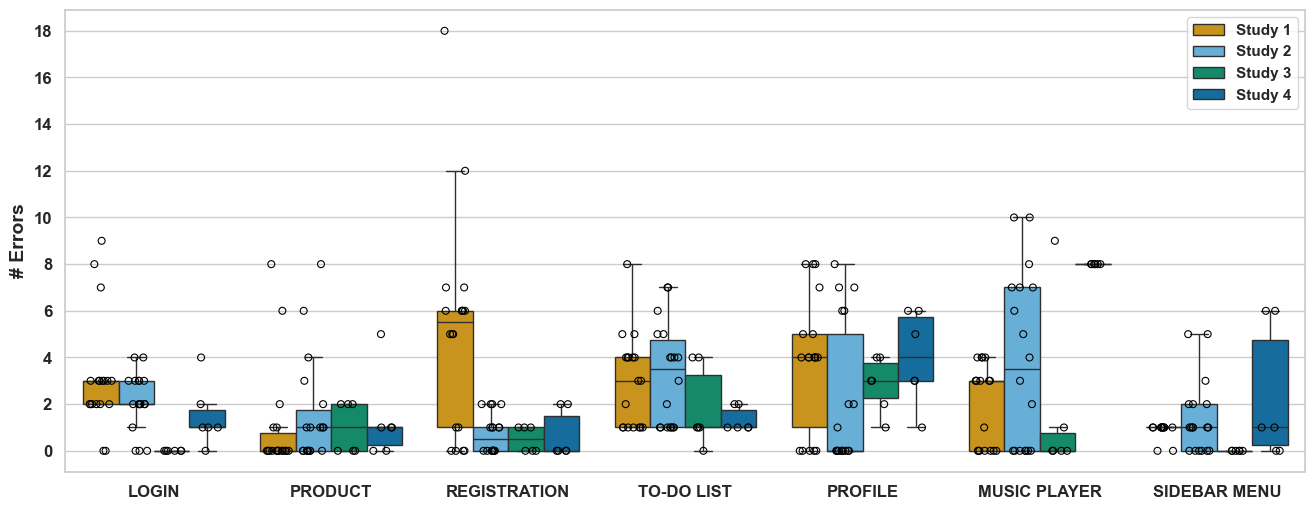

In [62]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Screen', y='Total', hue='Study', palette=palette_4, order=order_screen, showfliers=False)
sns.stripplot(data=df, x='Screen', y='Total', hue='Study', palette=color_dict_study, edgecolor='black', linewidth=.8, dodge=True, jitter=0.25, legend=False)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.ylabel('# Errors', fontsize=14, fontweight='bold', fontfamily='Arial')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', prop={'weight': 'bold'})
plt.show()

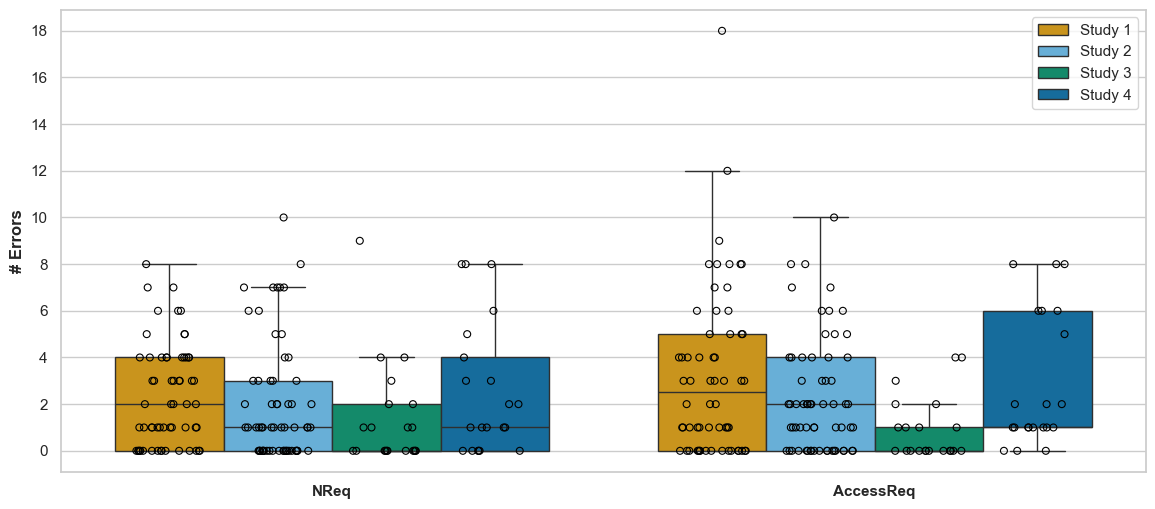

In [53]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df, x='Request', y='Total', hue='Study', palette=palette_4, showfliers=False)
sns.stripplot(data=df, x='Request', y='Total', hue='Study', palette=color_dict_study, edgecolor='black', linewidth=.8, dodge=True, jitter=0.25)


# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('')
plt.xticks(fontweight='bold', fontfamily='Arial')
plt.ylabel('# Errors', fontsize=12, fontweight='bold', fontfamily='Arial')
plt.legend(title='', handles=ax.get_legend_handles_labels()[0][:len(df['Study'].unique())])
plt.show()

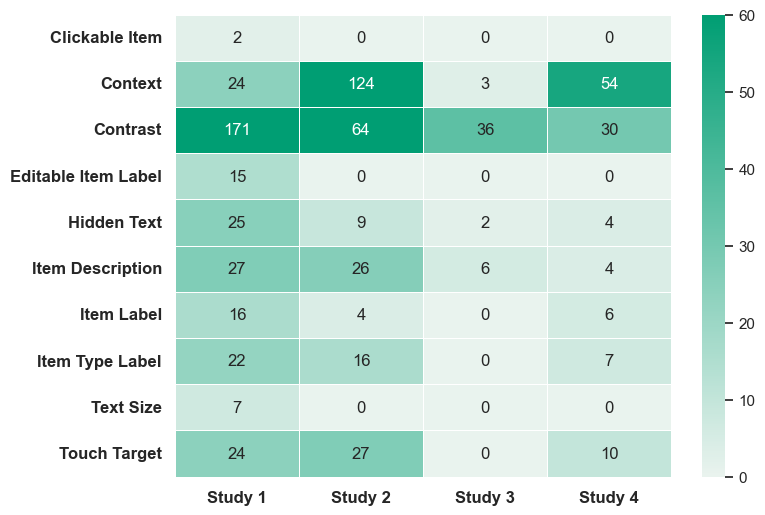

In [54]:
data = df.pivot_table(index='Study', values=['Context', 'Touch Target', 'Contrast', 'Item Description', 'Text Size', 'Hidden Text', 'Item Label', 'Item Type Label', 'Editable Item Label', 'Clickable Item'], aggfunc='sum')

# Criar o heatmap com eixos invertidos
plt.figure(figsize=(8, 6))
sns.heatmap(data.T, annot=True, fmt='d', cmap=sns.light_palette("#009E73", as_cmap=True), linewidths=.5, vmax=60)
plt.title('')
plt.xlabel('')
plt.xticks(fontweight='bold', fontsize=12, fontfamily='Arial')
plt.yticks(fontweight='bold', fontsize=12, fontfamily='Arial')
plt.show()

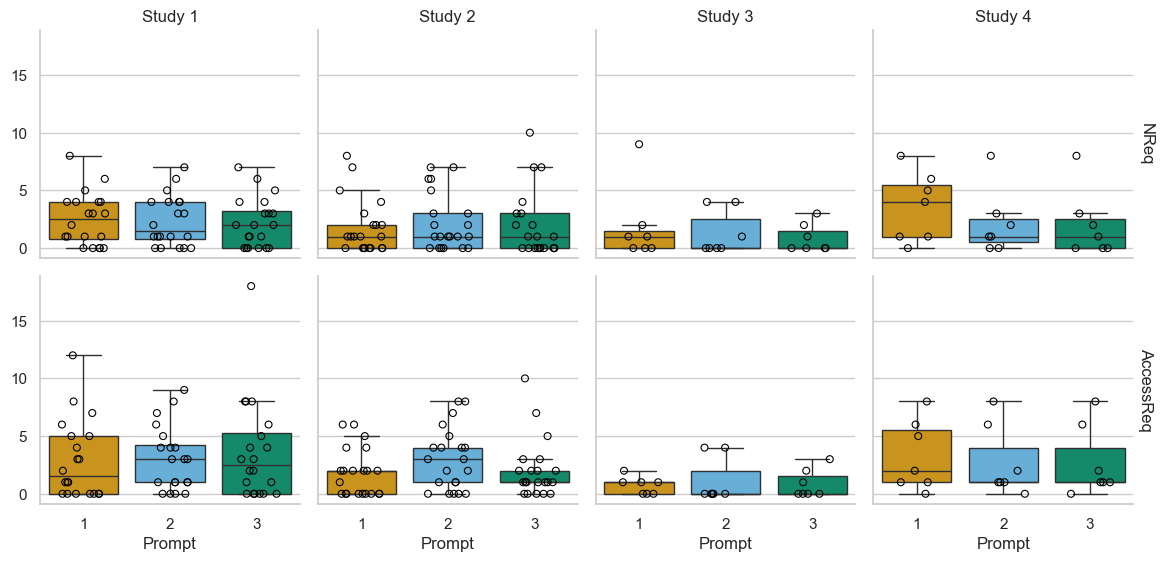

In [55]:
grid = sns.FacetGrid(df, row='Request', col='Study', margin_titles=True)
grid.map_dataframe(sns.boxplot, x='Prompt', y='Total', hue='Prompt', palette=palette_3, showfliers=False)
grid.map_dataframe(sns.stripplot, x='Prompt', y='Total', hue='Request', palette=color_dict_request, edgecolor='black', linewidth=.8, jitter=0.25)

grid.set_axis_labels("Prompt", "")
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
# Ajustando o layout
plt.subplots_adjust(top=0.9)
plt.show()

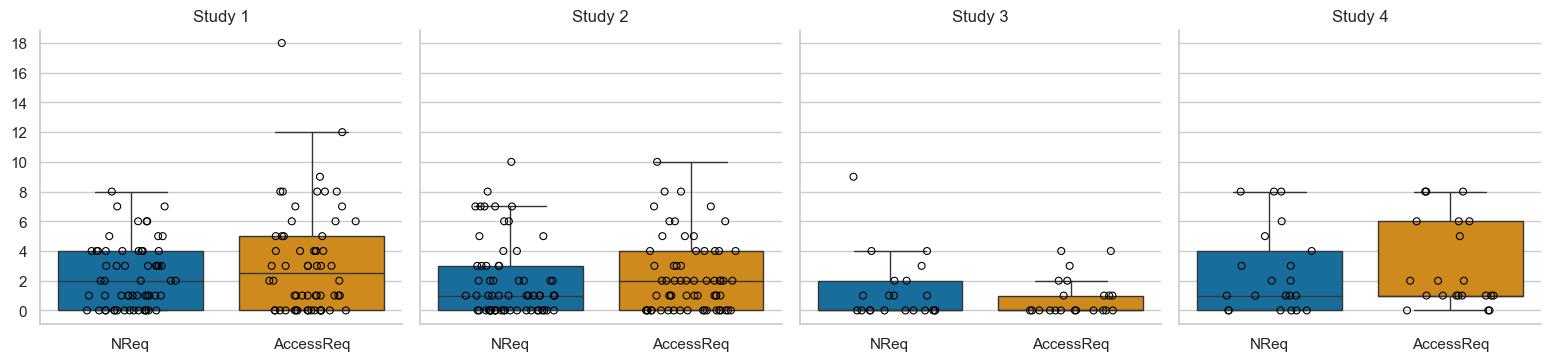

In [56]:
grid = sns.FacetGrid(df, col="Study", margin_titles=True, height=4)
grid.map_dataframe(sns.boxplot, x='Request', y='Total', hue='Request', palette=palette_request, showfliers=False)
grid.map_dataframe(sns.stripplot, x='Request', y='Total', hue='Request', palette=color_dict_request, edgecolor='black', linewidth=.8, jitter=0.25)

# Ajustando os ticks do eixo y para inteiros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

grid.set_axis_labels("", "")
grid.set_titles(col_template="{col_name}")
# Ajustando o layout
plt.subplots_adjust(top=0.9)
plt.show()

In [57]:
df_estudo2_filtered = df_estudo2[df_estudo2['LLM'] != 'ChatGPT-3.5']

df_combined = pd.concat([df_estudo1, df_estudo2_filtered, df_estudo3, df_estudo4])
df_combined.reset_index(drop=True, inplace=True)

total_geral = df_combined['Total'].sum()
media_geral = df_combined['Total'].mean()
desvio_padrao_geral = df_combined['Total'].std()

# Calculando as estatísticas para cada tipo de Request
estatisticas_request = df_combined.groupby('Request')['Total'].agg(['sum', 'mean', 'std'])

# Exibindo os resultados
print("Estudo no Geral:")
print(f"Total de Erros: {total_geral}")
print(f"Média de Erros: {media_geral:.2f}")
print(f"Desvio Padrão: {desvio_padrao_geral:.2f}\n")

print("Estatísticas por Request:")
print(estatisticas_request.round(2))

Estudo no Geral:
Total de Erros: 702
Média de Erros: 2.44
Desvio Padrão: 2.74

Estatísticas por Request:
           sum  mean   std
Request                   
AccessReq  387  2.69  3.00
NReq       315  2.19  2.44


In [58]:
from scipy.stats import ttest_rel

# Filtrando os dados para NReq e AccessReq
nreq_values = df_combined[df_combined['Request'] == 'NReq']['Total']
accessreq_values = df_combined[df_combined['Request'] == 'AccessReq']['Total']

# Realizando o teste t pareado
t_stat, p_value = ttest_rel(nreq_values, accessreq_values)

# Exibindo os resultados
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

T-statistic: -2.739
P-value: 0.00694
